In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d niten19/face-shape-dataset

 98% 625M/639M [00:03<00:00, 155MB/s]
100% 639M/639M [00:03<00:00, 168MB/s]


In [ ]:
import zipfile
zip_file=zipfile.ZipFile('/content/face-shape-dataset.zip')
zip_file.extractall('/tmp/new/')

In [ ]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from IPython.display import Image
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from tensorflow.keras.optimizers import Adam
import os
import shutil
import cv2
import shutil
from google.colab import files
import keras
from keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.models import Model
from keras.layers import Input, Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D, Dropout
from tensorflow.keras.models import Sequential
import cv2
import os
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
from tensorflow.keras.applications import InceptionResNetV2
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
import requests
from PIL import Image
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
import random
from keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = pathlib.Path('/tmp/new/FaceShape Dataset/training_set')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

data_dir = pathlib.Path('/tmp/new/FaceShape Dataset/testing_set')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3999
1000


['/tmp/new/FaceShape Dataset/training_set/Round/round (538).jpg', '/tmp/new/FaceShape Dataset/training_set/Round/round (381).jpg', '/tmp/new/FaceShape Dataset/training_set/Round/round (138).jpg', '/tmp/new/FaceShape Dataset/training_set/Round/round (938).jpg', '/tmp/new/FaceShape Dataset/training_set/Round/round (238).jpg', '/tmp/new/FaceShape Dataset/training_set/Round/round (38).jpg', '/tmp/new/FaceShape Dataset/training_set/Round/round (380).jpg', '/tmp/new/FaceShape Dataset/training_set/Round/round (389).jpg', '/tmp/new/FaceShape Dataset/training_set/Round/round (338).jpg', '/tmp/new/FaceShape Dataset/training_set/Round/round (384).jpg', '/tmp/new/FaceShape Dataset/training_set/Round/round (738).jpg', '/tmp/new/FaceShape Dataset/training_set/Round/round (382).jpg', '/tmp/new/FaceShape Dataset/training_set/Round/round (638).jpg', '/tmp/new/FaceShape Dataset/training_set/Round/round (383).jpg', '/tmp/new/FaceShape Dataset/training_set/Round/round (385).jpg', '/tmp/new/FaceShape Datas

(-0.5, 699.5, 699.5, -0.5)

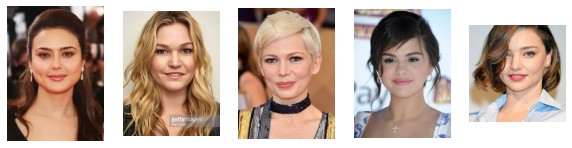

In [ ]:
path = '/tmp/new/FaceShape Dataset/training_set'

imgex = []

for i in os.listdir(path):
  a = path + '/' + i
  for i in os.listdir(a):
    if '38' in i:
      imgex.append(a + '/' + i)

print(imgex)
a = cv2.imread(imgex[0])
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
b = cv2.imread(imgex[1])
b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)
c = cv2.imread(imgex[2])
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
d = cv2.imread(imgex[3])
d = cv2.cvtColor(d, cv2.COLOR_BGR2RGB)
e = cv2.imread(imgex[4])
e = cv2.cvtColor(e, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 5

fig.add_subplot(rows, columns, 1)
plt.imshow(a)
plt.axis('off')

fig.add_subplot(rows, columns, 2)
plt.imshow(b)
plt.axis('off')

fig.add_subplot(rows, columns, 3)
plt.imshow(c)
plt.axis('off')

fig.add_subplot(rows, columns, 4)
plt.imshow(d)
plt.axis('off')

fig.add_subplot(rows, columns, 5)
plt.imshow(e)
plt.axis('off')

In [ ]:
#detect face untuk di crop dari library cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    faces = face_cascade.detectMultiScale(img, 1.3,5)
    for (x,y,w,h) in faces:
        roi_color = img[y-50:y+(h+50), x:x+(w)]
        eyes = eye_cascade.detectMultiScale(roi_color)
        if len(eyes) >= 2:
            return roi_color


path = "/tmp/new/FaceShape Dataset/testing_set/Square"
cr_path = "/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/data/test/square"

img = []

for entry in os.scandir(path):
    if entry.is_file():
        img.append(entry.path)

cropped = []
file_name_dict = {}
error_img = []

for i in img:
    count = 1
    file_name = i.split('/')[-1] 
    file_name_dict[file_name] = []

    try:
        roi_color = get_cropped_image_if_2_eyes(i)
        cropped_folder = cr_path
    
        if not os.path.exists(cropped_folder):
            os.makedirs(cropped_folder)
            cropped.append(cropped_folder)
            print("Generating cropped images in folder: " + cropped_folder + '\n')

        cropped_file_path = cropped_folder  + '/' + file_name  
        
        try:
            cv2.imwrite(cropped_file_path, roi_color)
            file_name_dict[file_name].append(cropped_file_path)
            print('Cropping: ' + file_name)
            print("from: " + i)
            print('to: ' + cropped_folder + '\n')
        except:
            print('This file: "{}" cant be read \n'.format(file_name))
            error_img.append(file_name)
        
        



        count += 1

    except Exception as e:
        print(str(e)) 

if error_img == []:
    print("There is no image that is error / blocked")
else:
    print("This Image below is blocked, bisa dignati atau kalo masih\nmau make image ini bisa di unblock di propertis trs edit: ")
    print(error_img)

            



In [ ]:
path = '/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/data/test/square'
dst = '/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/data/square'

for i in os.listdir(path):
  a = path + '/' + i
  shutil.copy2(a, dst)

['/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/data//square/square (105).jpg', '/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/data//round/round (105).jpg', '/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/data//oval/oval (105).jpg', '/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/data//oblong/oblong (105).jpg', '/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/data//heart/heart (105).jpg']


(-0.5, 213.5, 313.5, -0.5)

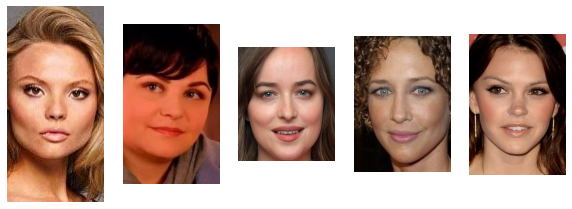

In [ ]:

path = '/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/data/'

imgex = []

for i in os.listdir(path):
  a = path + '/' + i
  for i in os.listdir(a):
    if '105' in i:
      imgex.append(a + '/' + i)

print(imgex)

a = cv2.imread(imgex[0])
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
b = cv2.imread(imgex[1])
b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)
c = cv2.imread(imgex[2])
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
d = cv2.imread(imgex[3])
d = cv2.cvtColor(d, cv2.COLOR_BGR2RGB)
e = cv2.imread(imgex[4])
e = cv2.cvtColor(e, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 5

fig.add_subplot(rows, columns, 1)
plt.imshow(a)
plt.axis('off')

fig.add_subplot(rows, columns, 2)
plt.imshow(b)
plt.axis('off')

fig.add_subplot(rows, columns, 3)
plt.imshow(c)
plt.axis('off')

fig.add_subplot(rows, columns, 4)
plt.imshow(d)
plt.axis('off')

fig.add_subplot(rows, columns, 5)
plt.imshow(e)
plt.axis('off')

In [ ]:
train_data_dir = '/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/data/' #Input Data
img_height = 224
img_width = 224
batch_size = 32

train_datagen = ImageDataGenerator( #Pre-processing Data & Augmentasi Data 
    zca_epsilon=1e-06, 
    rotation_range=30, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    brightness_range=[0.5,1.5], 
    shear_range=0.2, 
    zoom_range=0.2,
    channel_shift_range=0.0, 
    fill_mode='nearest', 
    cval=0.0,
    horizontal_flip=True, 
    vertical_flip=True, 
    rescale=1/255,
    validation_split=0.28, #Pemisahan data 80% Training 20% Validasi
) # set validation split

train_generator = train_datagen.flow_from_directory( 
    train_data_dir,#Data Training dimasukan
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

test_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size= batch_size,
    class_mode='categorical',
    shuffle = False,
    subset='validation') # set as validation data

Found 3110 images belonging to 5 classes.
Found 1206 images belonging to 5 classes.


In [ ]:
epochs = 55 #Pengulangan 

#Membangun model ML

base_model = InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3),
    pooling='avg'
)

base_model.trainable = False

model = Sequential([
    base_model,
    Dense(1024, activation = 'relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4), #0.0001
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1024)              1573888   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 55,915,749
Trainable params: 1,579,013
Non-trainable params: 54,336,736
_________________________________________________________________


In [ ]:
callbacks =  EarlyStopping(patience=50, monitor="val_loss")

In [ ]:
# Menerapkan model ke data
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
result = model.fit(train_generator,
                   steps_per_epoch = train_generator.samples // batch_size, 
                   validation_data = test_generator,
                   validation_steps = test_generator.samples // batch_size,
                   epochs = epochs
                   )

Epoch 1/5
97/97 [==============================] - 85s 869ms/step - loss: 1.3428 - accuracy: 0.4470 - val_loss: 1.4347 - val_accuracy: 0.4003
Epoch 2/5
97/97 [==============================] - 84s 860ms/step - loss: 1.3409 - accuracy: 0.4425 - val_loss: 1.3910 - val_accuracy: 0.4113
Epoch 3/5
97/97 [==============================] - 82s 847ms/step - loss: 1.3383 - accuracy: 0.4373 - val_loss: 1.4035 - val_accuracy: 0.4003
Epoch 4/5
97/97 [==============================] - 82s 846ms/step - loss: 1.3366 - accuracy: 0.4441 - val_loss: 1.4188 - val_accuracy: 0.4105
Epoch 5/5
97/97 [==============================] - 82s 851ms/step - loss: 1.3461 - accuracy: 0.4435 - val_loss: 1.4300 - val_accuracy: 0.3902


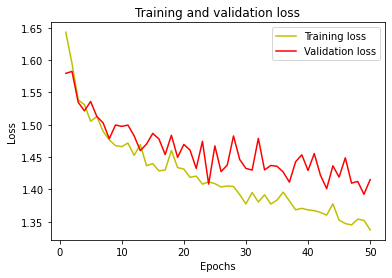

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



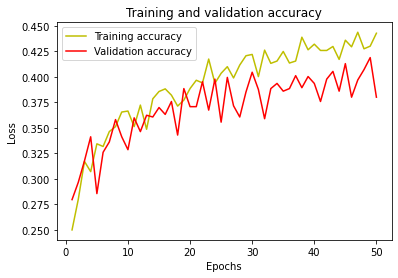

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = result.history['accuracy']
val_loss = result.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
model.save('/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/model_incresv2_3_50.h5')

In [ ]:
# Menerapkan model ke data
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
result = model.fit(train_generator,
                   steps_per_epoch = train_generator.samples // batch_size, 
                   validation_data = test_generator,
                   validation_steps = test_generator.samples // batch_size,
                   epochs = 5
                   )

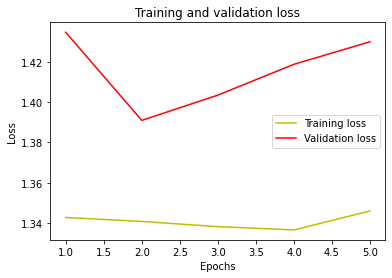

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



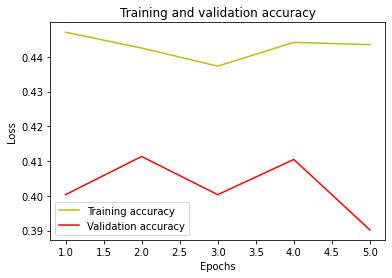

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = result.history['accuracy']
val_loss = result.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
model.save('/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/model_incresv2_3_55.h5')

In [ ]:
# Menerapkan model ke data
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
result = model.fit(train_generator,
                   steps_per_epoch = train_generator.samples // batch_size, 
                   validation_data = test_generator,
                   validation_steps = test_generator.samples // batch_size,
                   epochs = 10
                   )

Epoch 1/10
97/97 [==============================] - 87s 897ms/step - loss: 1.3468 - accuracy: 0.4379 - val_loss: 1.3971 - val_accuracy: 0.4096
Epoch 2/10
97/97 [==============================] - 80s 831ms/step - loss: 1.3352 - accuracy: 0.4431 - val_loss: 1.3876 - val_accuracy: 0.4164
Epoch 3/10
97/97 [==============================] - 80s 827ms/step - loss: 1.3200 - accuracy: 0.4552 - val_loss: 1.4289 - val_accuracy: 0.4105
Epoch 4/10
97/97 [==============================] - 80s 831ms/step - loss: 1.3316 - accuracy: 0.4474 - val_loss: 1.4049 - val_accuracy: 0.4122
Epoch 5/10
97/97 [==============================] - 81s 832ms/step - loss: 1.3337 - accuracy: 0.4435 - val_loss: 1.4156 - val_accuracy: 0.3910
Epoch 6/10
97/97 [==============================] - 81s 836ms/step - loss: 1.3320 - accuracy: 0.4542 - val_loss: 1.3740 - val_accuracy: 0.4189
Epoch 7/10
97/97 [==============================] - 83s 853ms/step - loss: 1.3161 - accuracy: 0.4587 - val_loss: 1.3809 - val_accuracy: 0.4130

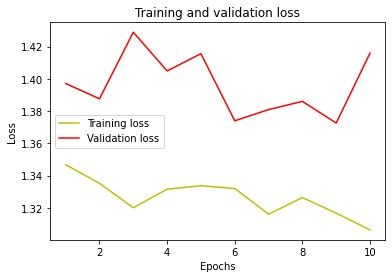

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



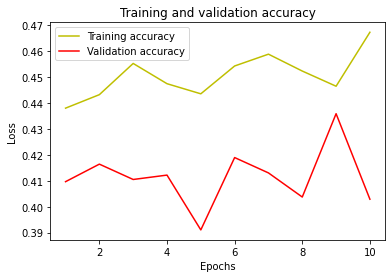

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = result.history['accuracy']
val_loss = result.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
model.save('/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/model_incresv2_3_65.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/model_incresv2_3_65.h5')

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
result = model.fit(train_generator,
                   steps_per_epoch = train_generator.samples // batch_size, 
                   validation_data = test_generator,
                   validation_steps = test_generator.samples // batch_size,
                   epochs = 100
                   )

Epoch 1/100
97/97 [==============================] - 866s 9s/step - loss: 1.3136 - accuracy: 0.4620 - val_loss: 1.3874 - val_accuracy: 0.4189
Epoch 2/100
97/97 [==============================] - 83s 854ms/step - loss: 1.3079 - accuracy: 0.4607 - val_loss: 1.4022 - val_accuracy: 0.3986
Epoch 3/100
97/97 [==============================] - 82s 850ms/step - loss: 1.3332 - accuracy: 0.4470 - val_loss: 1.4071 - val_accuracy: 0.3978
Epoch 4/100
97/97 [==============================] - 82s 846ms/step - loss: 1.3115 - accuracy: 0.4656 - val_loss: 1.3848 - val_accuracy: 0.4265
Epoch 5/100
97/97 [==============================] - 82s 847ms/step - loss: 1.3099 - accuracy: 0.4682 - val_loss: 1.3841 - val_accuracy: 0.4139
Epoch 6/100
97/97 [==============================] - 82s 848ms/step - loss: 1.3031 - accuracy: 0.4607 - val_loss: 1.3768 - val_accuracy: 0.4105
Epoch 7/100
97/97 [==============================] - 82s 846ms/step - loss: 1.3099 - accuracy: 0.4633 - val_loss: 1.4263 - val_accuracy: 0

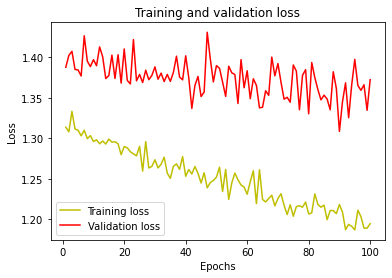

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

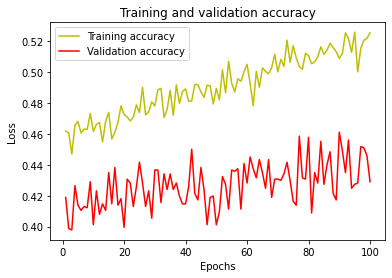

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = result.history['accuracy']
val_loss = result.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
model.save('/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/model_incresv2_3_165.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/model_incresv2_3_165.h5')

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
result = model.fit(train_generator,
                   steps_per_epoch = train_generator.samples // batch_size, 
                   validation_data = test_generator,
                   validation_steps = test_generator.samples // batch_size,
                   epochs = 100
                   )

Epoch 1/100
97/97 [==============================] - 2342s 24s/step - loss: 1.1762 - accuracy: 0.5377 - val_loss: 1.3753 - val_accuracy: 0.4333
Epoch 2/100
97/97 [==============================] - 81s 831ms/step - loss: 1.1956 - accuracy: 0.5156 - val_loss: 1.3136 - val_accuracy: 0.4544
Epoch 3/100
97/97 [==============================] - 80s 828ms/step - loss: 1.2008 - accuracy: 0.5071 - val_loss: 1.3492 - val_accuracy: 0.4316
Epoch 4/100
97/97 [==============================] - 80s 821ms/step - loss: 1.1818 - accuracy: 0.5179 - val_loss: 1.3691 - val_accuracy: 0.4333
Epoch 5/100
97/97 [==============================] - 80s 822ms/step - loss: 1.1851 - accuracy: 0.5341 - val_loss: 1.3636 - val_accuracy: 0.4307
Epoch 6/100
97/97 [==============================] - 81s 833ms/step - loss: 1.1757 - accuracy: 0.5302 - val_loss: 1.3746 - val_accuracy: 0.4350
Epoch 7/100
97/97 [==============================] - 80s 827ms/step - loss: 1.1860 - accuracy: 0.5218 - val_loss: 1.4048 - val_accuracy:

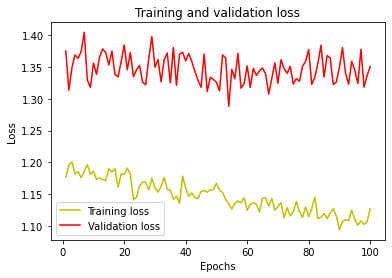

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

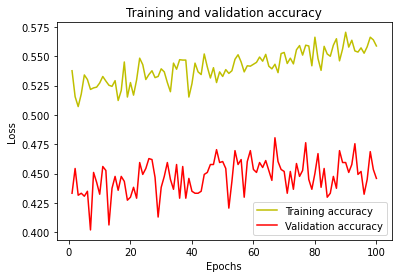

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = result.history['accuracy']
val_loss = result.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
model.save('/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/model_incresv2_3_265.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/Project BGKT/FasceShape/kaggle final/model_incresv2_3_265.h5')

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
result = model.fit(train_generator,
                   steps_per_epoch = train_generator.samples // batch_size, 
                   validation_data = test_generator,
                   validation_steps = test_generator.samples // batch_size,
                   epochs = 50
                   )